
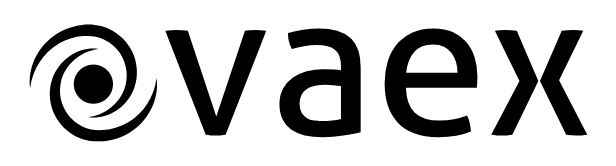

https://vaex.io/docs/index.html

What is vaex?

- A library with significantly better performance than pandas
- Easily handle even large data sets

In [ ]:
path = "../input/tabular-playground-series-jan-2021/train.csv"

In [ ]:
pip install --upgrade pip

In [ ]:
pip install vaex==2.6.1

In [ ]:
%%time
import vaex as vx
vx_df = vx.read_csv(path)[:, 1:-1]
display(vx_df)

In [ ]:
%%time
import pandas as pd
pd_df = pd.read_csv(path, index_col=0)
pd_df

In [ ]:
%%time
vx_df["cont1"]

In [ ]:
%%time
pd_df["cont1"]

In [ ]:
%%time
vx_df[vx_df.cont1 < 0]

In [ ]:
%%time
pd_df[pd_df.cont1 < 0]

In [ ]:
%%time
vx_df.mean(vx_df.cont1)

In [ ]:
%%time
pd_df.cont1.mean()

In [ ]:
%%time
vx_df.correlation(x="cont1", y="target")

In [ ]:
%%time
pd_df[["cont1", "target"]].corr()

In [ ]:
vx_df.column_names

In [ ]:
%%time
import vaex.ml

features = vx_df.column_names[:-1]
pca = vaex.ml.PCA(features=features, n_components=3)
pca_df = pca.fit_transform(vx_df)
pca_df

In [ ]:
%%time
from sklearn.decomposition import PCA

features = pd_df.columns[:-1]
pca = PCA(n_components=3)
pca_ar = pca.fit_transform(pd_df[features])
pca_df = pd.concat(
    [
        pd_df[features].reset_index(drop=True),
        pd.DataFrame(pca_ar)
    ],
    axis=1
)

pca_df